In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

path = r"D:\Harsh\Projects\Cutomer_Churn\Data-Resources\Data & Resources\Data\prediction_processed_views.xlsx" 
sheet_name = 'vw_churndata'

data = pd.read_excel(path, sheet_name = sheet_name)
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_months Value_deal Phone_service Multiple_lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_method Monthly_charge Total_charges Total_refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [2]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_referrals', 'Tenure_in_months', 'Value_deal',
       'Phone_service', 'Multiple_lines', 'Internet_service', 'Internet_type',
       'Online_security', 'Online_backup', 'Device_protection_plan',
       'Premium_support', 'Streaming_TV', 'Streaming_movies',
       'Streaming_music', 'Unlimited_data', 'Contract', 'Paperless_billing',
       'Payment_method', 'Monthly_charge', 'Total_charges', 'Total_refunds',
       'Total_extra_data_charges', 'Total_long_distance_charges',
       'Total_revenue', 'Customer_status', 'Churn_category', 'Churn_reason'],
      dtype='object')

In [3]:
data = data.drop(['Customer_ID','Churn_category','Churn_reason'], axis=1)

columns_to_encode = ['Phone_service','Streaming_TV', 'Streaming_movies','Streaming_music','Unlimited_data',
                     'Gender','Multiple_lines','Device_protection_plan','Online_backup',
                     'Married','State','Value_deal','Internet_service','Internet_type','Online_security',
                     'Premium_support','Contract','Paperless_billing','Payment_method']

label_encoders = {}
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data['Customer_status'] = data['Customer_status'].map({'Stayed': 0, 'Churned': 1})

X = data.drop('Customer_status', axis=1)
Y = data['Customer_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_referrals',
       'Tenure_in_months', 'Value_deal', 'Phone_service', 'Multiple_lines',
       'Internet_service', 'Internet_type', 'Online_security', 'Online_backup',
       'Device_protection_plan', 'Premium_support', 'Streaming_TV',
       'Streaming_movies', 'Streaming_music', 'Unlimited_data', 'Contract',
       'Paperless_billing', 'Payment_method', 'Monthly_charge',
       'Total_charges', 'Total_refunds', 'Total_extra_data_charges',
       'Total_long_distance_charges', 'Total_revenue', 'Customer_status'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Define models and their parameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb),
    'SVM': (SVC(max_iter=500, random_state=42), param_grid_svm),
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), param_grid_lr)
}

# Perform GridSearchCV for each model and store the best model
best_models = {}
best_accuracies = {}

for name, (model, param_grid) in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    # Store the best model and its accuracy
    best_models[name] = grid_search.best_estimator_
    Y_pred = best_models[name].predict(X_test)
    best_accuracies[name] = accuracy_score(Y_test, Y_pred)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"{name} Accuracy: {best_accuracies[name]:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))
    print("\n" + "="*50 + "\n")

# Find the best model based on accuracy
best_model_name = max(best_accuracies, key=best_accuracies.get)
best_model = best_models[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {best_accuracies[best_model_name]:.4f}")


Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Accuracy: 0.8411
Confusion Matrix:
[[783  64]
 [127 228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.64      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



Tuning hyperparameters for XGBoost...


C:\Users\hiren\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
XGBoost Accuracy: 0.8444
Confusion Matrix:
[[772  75]
 [112 243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       847
           1       0.76      0.68      0.72       355

    accuracy                           0.84      1202
   macro avg       0.82      0.80      0.81      1202
weighted avg       0.84      0.84      0.84      1202



Tuning hyperparameters for SVM...


C:\Users\hiren\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.4085
Confusion Matrix:
[[169 678]
 [ 33 322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.20      0.32       847
           1       0.32      0.91      0.48       355

    accuracy                           0.41      1202
   macro avg       0.58      0.55      0.40      1202
weighted avg       0.68      0.41      0.37      1202



Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7953
Confusion Matrix:
[[727 120]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       847
           1       0.66      0.65      0.65       355

    accuracy                           0.80      1202
   macro avg       0.75      0.75      0.75      1202


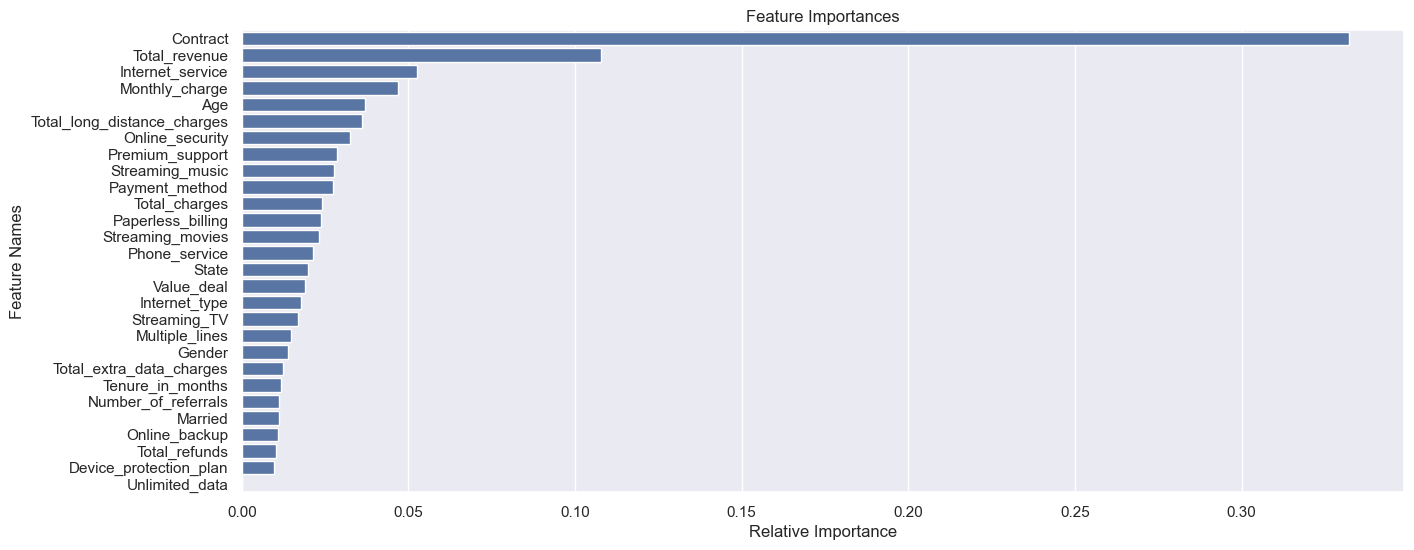

In [13]:
# Feature Importance 
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load new data from Excel
sheet2_name = 'vw_joinData'
new_data = pd.read_excel(path, sheet_name=sheet2_name)
print(new_data.head())

# Make a copy of the original data for later use
original_data = new_data.copy()

# Extract customer IDs for reference
customer_ids = new_data['Customer_ID']

# Drop unnecessary columns for prediction
new_data = new_data.drop(['Customer_ID', 'Customer_status', 'Churn_category', 'Churn_reason'], axis=1)

# Ensure label_encoders is defined and contains encoders for all categorical columns
# Example: label_encoders = {'column_name': LabelEncoder()}
# If not defined, you need to fit and transform the categorical columns
for col in new_data.select_dtypes(include=["object"]).columns:
    if col in label_encoders:
        new_data[col] = label_encoders[col].transform(new_data[col])
    else:
        # If no encoder is found, create one and fit/transform the column
        label_encoders[col] = LabelEncoder()
        new_data[col] = label_encoders[col].fit_transform(new_data[col])

# Make predictions using the best model
new_predictions = best_model.predict(new_data)

# Add predictions to the original data
original_data['Customer_status_newlypredicted'] = new_predictions

# Filter rows where Customer_status_predicted == 1 (or any other condition)
original_data = original_data[original_data['Customer_status_newlypredicted'] == 1]

# Save the filtered data to a CSV file
output_path = r"D:\Harsh\Projects\Cutomer_Churn\newpredicted_data.csv"
original_data.to_csv(output_path, index=False)

print(f"Predictions saved to {output_path}")

  Customer_ID  Gender  Age Married        State  Number_of_referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_months Value_deal Phone_service Multiple_lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_method Monthly_charge Total_charges Total_refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4